In [1]:
import matplotlib.pyplot as plt

# Giả sử có 3 bộ dữ liệu cho thí nghiệm độ nhạy
x = [1, 2, 3, 4, 5]
y1 = [2, 3, 5, 7, 11]
y2 = [1, 4, 6, 8, 12]
y3 = [3, 5, 7, 9, 13]

# Nhãn cho các đường
labels = ['Experiment 1', 'Experiment 2', 'Experiment 3']


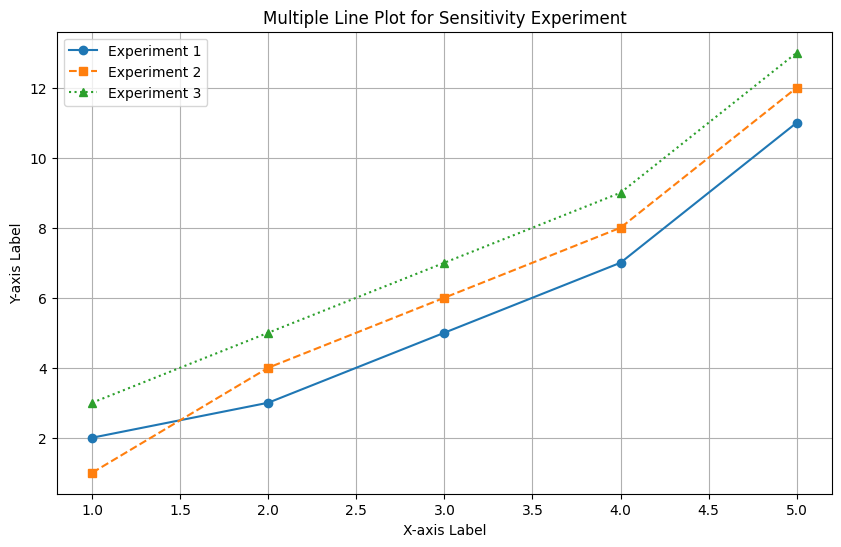

In [2]:
plt.figure(figsize=(10, 6))

# Vẽ từng đường với các kiểu và màu sắc khác nhau
plt.plot(x, y1, marker='o', linestyle='-', label=labels[0])
plt.plot(x, y2, marker='s', linestyle='--', label=labels[1])
plt.plot(x, y3, marker='^', linestyle=':', label=labels[2])

# Thêm tiêu đề và nhãn trục
plt.title('Multiple Line Plot for Sensitivity Experiment')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Hiển thị lưới
plt.grid(True)

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.show()


[[0.64 0.61 0.55 0.53 0.51 0.52 0.53 0.59 0.64 0.62]
 [0.64 0.6  0.55 0.53 0.49 0.51 0.51 0.56 0.64 0.62]
 [0.64 0.61 0.54 0.53 0.49 0.51 0.51 0.55 0.64 0.62]
 [0.64 0.61 0.54 0.52 0.49 0.49 0.51 0.55 0.63 0.62]
 [0.62 0.6  0.53 0.51 0.49 0.49 0.51 0.55 0.63 0.62]
 [0.61 0.57 0.53 0.51 0.49 0.49 0.51 0.55 0.63 0.62]
 [0.61 0.56 0.5  0.5  0.47 0.48 0.51 0.55 0.63 0.62]
 [0.59 0.53 0.48 0.48 0.47 0.47 0.49 0.55 0.63 0.62]
 [0.47 0.49 0.47 0.48 0.47 0.47 0.48 0.55 0.63 0.62]
 [0.47 0.48 0.47 0.48 0.47 0.47 0.48 0.55 0.63 0.62]]


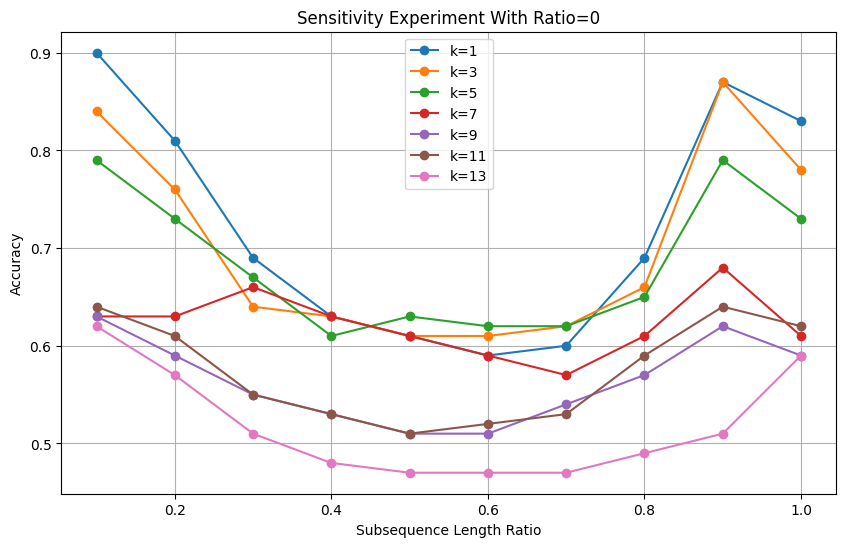

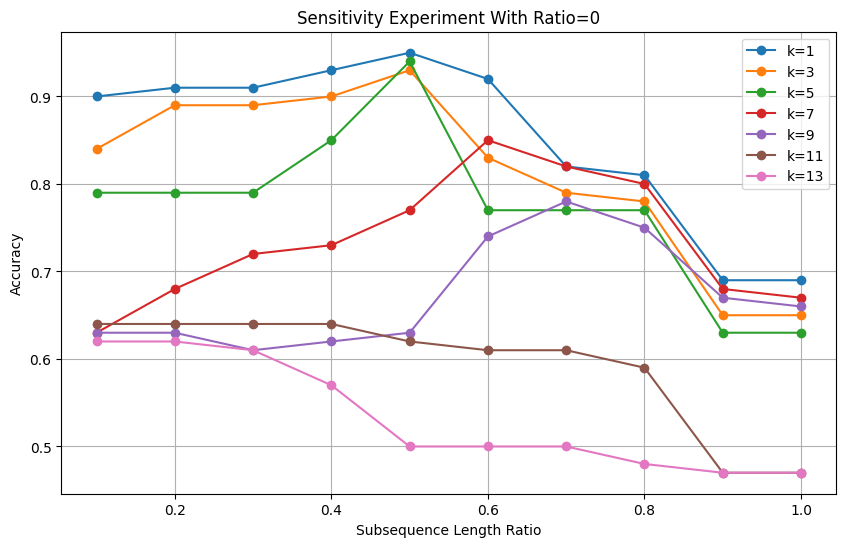

In [49]:
import re
import matplotlib.pyplot as plt
import numpy as np
r1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
r2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
def getSensitivityMatrix(dataset = "BME", k = 1):
    M = np.zeros((10, 10))
    with open('Results/finals/sensitivityBME copy.txt', 'r') as file:
        for line in file:
            line = line.strip()
            pattern = r"BME\((\d+)\)"
            match = re.search(pattern, line)
            number = int(match.group(1))
            if number == k:
                words = line.split("&")
                for i in range(1, len(words)):
                    pattern = r"\(([^;]+);([^)]+)\)\s+([0-9.]+)"
                    string = words[i].strip()
                    matches = re.match(pattern, string)
                    num1 = int(float(matches.group(1))*10) - 1
                    num2 = int(float(matches.group(2))*10) - 1
                    num3 = float(matches.group(3))
                    # row index is ratio, column index is sub_ratio
                    M[num1][num2] = num3
            else:
                continue
    return M
def getSensitivityExperimentResultK(ratio = True, value = 0):
    if ratio == True:
        plt.figure(figsize=(10, 6))
        for i in range(1, 14, 2):
            M = getSensitivityMatrix(k=i)
            plt.plot(r1, M[value], marker='o', linestyle='-', label=f"k={i}")
        plt.title(f'Sensitivity Experiment With Ratio={value}')
        plt.xlabel('Subsequence Length Ratio')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.legend()
        plt.show()
    if ratio == False:
        plt.figure(figsize=(10, 6))
        for i in range(1, 14, 2):
            M = getSensitivityMatrix(k=i)
            data = [row[value] for row in M]
            plt.plot(r2, data, marker='o', linestyle='-', label=f"k={i}")
        plt.title(f'Sensitivity Experiment With Ratio={value}')
        plt.xlabel('Subsequence Length Ratio')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.legend()
        plt.show()
print(getSensitivityMatrix(k=11))
getSensitivityExperimentResultK(value=0)
getSensitivityExperimentResultK(ratio=False, value=0)

In [5]:
from GetData.GetDataMultiDimensions import getDataMultiVariate
X_train, X_test, y_train, y_test = getDataMultiVariate("MSRAction3D")

In [71]:
x, y = X_train[0], X_test[0]
x = np.array(x).reshape(np.array(x).shape[0], -1)
y = np.array(y).reshape(np.array(y).shape[0], -1)
C = ot.dist(x, y, metric="euclidean", p=2)

In [6]:
from MaskingMap.MaskingMapLinear import masking_map_linear

In [7]:
masking_map_linear(X_train[0], X_test[0])

0.6393554269609263

In [66]:
X_train[0].shape, X_test[0].shape

((38, 13), (28, 13))

In [68]:
x, y = X_train[0], X_test[0]
rows_diff = x.shape[0] - y.shape[0]
columns_diff = x.shape[1] - y.shape[1]
if rows_diff > 0:
    zero_rows = np.zeros((rows_diff, y.shape[1]))
    y = np.vstack((y, zero_rows))
elif rows_diff < 0:
    zero_rows = np.zeros((-rows_diff, x.shape[1]))
    x = np.vstack((x, zero_rows))
if columns_diff > 0:
    zero_columns = np.zeros((y.shape[0], columns_diff))
    y = np.hstack((y, zero_columns))
elif columns_diff < 0:
    zero_columns = np.zeros((x.shape[0], -columns_diff))
    x = np.hstack((x, zero_columns))

In [70]:
x.shape, y.shape
import ot
ot.dist(x, y)

array([[ 9.30543565, 23.82628202, 25.81547974, ..., 59.90876758,
        59.90876758, 59.90876758],
       [ 8.34816403, 20.94082338, 22.30107159, ..., 57.44736063,
        57.44736063, 57.44736063],
       [ 4.07101723, 11.12202133, 12.46330771, ..., 76.44660419,
        76.44660419, 76.44660419],
       ...,
       [52.0002907 , 77.83558941, 83.68999584, ...,  7.81757582,
         7.81757582,  7.81757582],
       [48.51193682, 75.50969146, 81.23252293, ..., 11.66759111,
        11.66759111, 11.66759111],
       [51.99930982, 79.55002312, 84.86520883, ...,  9.91144549,
         9.91144549,  9.91144549]])

In [63]:
cost_matrix_aw(X_train[0], X_test[0])

IndexError: tuple index out of range

In [60]:
from MaskingMap.Utilities.utils import cost_matrix_aw
a = np.array([[1, 2],[3,4]])
b = np.array([[1, 2, 5], [1,3,4]])
print(a.shape[1], b.shape[1])
C = cost_matrix_aw(a, b)

2 3


IndexError: tuple index out of range